# Описание проекта
Мы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. \
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Шаг 1. Общая информация
Откроем файлы с данными и изучим общую информацию. Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats as st

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_int = pd.read_csv('/datasets/internet.csv')
df_msgs = pd.read_csv('/datasets/messages.csv')
df_trfs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

In [3]:
display(df_calls.sample(10))
df_calls.info()
display(df_int.sample(10))
df_int.info()
display(df_msgs.sample(10))
df_msgs.info()

display(df_trfs.head())
display(df_users.sample(10))
df_users.info()

,id,call_date,duration,user_id
49750,1123_769,2018-06-01,0.00,1123
86616,1217_481,2018-05-23,19.59,1217
152913,1380_548,2018-09-21,3.85,1380
75181,1187_134,2018-10-05,0.52,1187
120780,1312_110,2018-12-19,24.08,1312
34845,1086_394,2018-09-03,2.91,1086
194051,1476_348,2018-10-09,15.54,1476
146720,1374_154,2018-05-09,7.71,1374
134330,1344_147,2018-11-13,0.00,1344
53043,1134_104,2018-04-22,0.00,1134


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
139899,139899,1469_287,588.04,2018-12-30,1469
41930,41930,1146_265,354.53,2018-11-10,1146
37795,37795,1132_168,597.05,2018-09-07,1132
72063,72063,1243_280,823.91,2018-12-03,1243
81277,81277,1275_60,210.80,2018-06-30,1275
64784,64784,1219_691,773.43,2018-06-24,1219
124083,124083,1417_117,225.21,2018-08-26,1417
102180,102180,1341_295,302.59,2018-07-28,1341
632,632,1002_325,412.91,2018-11-21,1002
19360,19360,1065_505,0.00,2018-09-26,1065


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,id,message_date,user_id
13098,1055_64,2018-01-25,1055
53345,1236_1,2018-12-24,1236
51452,1231_73,2018-10-17,1231
17174,1076_323,2018-07-01,1076
63737,1277_414,2018-11-03,1277
52981,1233_166,2018-11-06,1233
27547,1119_70,2018-07-26,1119
12939,1054_495,2018-10-19,1054
48442,1214_241,2018-10-20,1214
71280,1302_108,2018-10-08,1302


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
347,1347,29,NaN,Москва,Лола,Фокина,2018-11-01,ultra
253,1253,29,NaN,Астрахань,Алла,Масленникова,2018-08-06,ultra
178,1178,56,NaN,Москва,Наталья,Жарова,2018-05-15,smart
440,1440,51,NaN,Москва,Арсений,Матвеев,2018-05-28,ultra
430,1430,22,NaN,Тверь,Андрей,Авроров,2018-04-23,ultra
492,1492,63,NaN,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
450,1450,53,NaN,Москва,Алиса,Козлова,2018-10-10,smart
31,1031,66,NaN,Москва,Лаврентий,Тимофеев,2018-11-02,smart
472,1472,53,NaN,Ярославль,Наида,Боброва,2018-01-18,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
#df_calls.query('duration == 0.00').count() # 39613 значений
#df_calls.query('1.00 > duration > 0.00').count() # 8314 значений

## Шаг 1. Вывод:
Импортировали необходимые библиотеки. Открыли файлы csv. Выявили следующие проблемы \
'/datasets/calls.csv' - формат даты, большое количество нулевых значений столбца 'duration' \
'/datasets/internet.csv' - формат даты, лишний столбец 'Unnamed: 0' \
'/datasets/messages.csv' - формат даты \
'/datasets/tariffs.csv' - ОК \
'/datasets/users.csv' - формат даты, churn_date — дата прекращения пользования тарифом (если значение NaN, то тариф ещё действовал на момент выгрузки данных) 

Значений 0.00 в столбце 'duration' - 39613, это порядка 20%. Тут две теории, либо таким образом записывались пропущенные вызовы, в таком случае их не учитываем, либо это ошибка в записи и так округлились вызовы меньше минуты. С помощью df_calls.query('1.00 > duration > 0.00'), нашли 8314 значений, значит вторая теория неверна, система умеет записывать вызовы меньше 1.00 минуты.


## Шаг 2. Подготовка данных
Подготовим данные. \
Учтем замечания, которые указали в выводе первого шага. Также подготовим сводные таблицы под следующие задачи для каждого пользователя: 
 - количество сделанных звонков и израсходованных минут разговора по месяцам; 
 - количество отправленных сообщений по месяцам; 
 - объем израсходованного интернет-трафика по месяцам; 
 - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).



In [5]:
df_calls = df_calls.query('duration > 0.00').reset_index(drop=True) # фильтруем нулевые значения
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d') # формат даты
df_calls['month']=df_calls['call_date'].dt.month # создаем столбец с номером месяца
print('Количество звонящих абонентов:', len(df_calls['user_id'].unique()))
df1 = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
df1.columns = ['calls', 'sum_min']
df1 = df1.reset_index()
df1 # количество сделанных звонков и израсходованных минут разговора по месяцам на каждого пользователя

Количество звонящих абонентов: 492


,user_id,month,calls,sum_min
0,1000,5,17,150.06
1,1000,6,28,158.90
2,1000,7,41,318.80
3,1000,8,42,389.87
4,1000,9,46,440.14
...,...,...,...,...
3163,1498,10,30,232.63
3164,1499,9,8,64.65
3165,1499,10,44,429.91
3166,1499,11,62,576.50


In [6]:
df_msgs['message_date'] = pd.to_datetime(df_msgs['message_date'], format='%Y-%m-%d')
df_msgs['month']=df_msgs['message_date'].dt.month
print('Количество пишущих абонентов:', len(df_msgs['user_id'].unique())) 
df2 = df_msgs.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
df2.columns = ['messages']
df2 = df2.reset_index()
df2 # количество отправленных сообщений по месяцам на каждого пользователя

Количество пишущих абонентов: 426


,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [7]:
df_int['session_date'] = pd.to_datetime(df_int['session_date'], format='%Y-%m-%d')
df_int['month']=df_int['session_date'].dt.month
print('Количество использующих интернет абонентов:', len(df_int['user_id'].unique()))
df3 = df_int.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
df3.columns = ['mb_used']
df3 = df3.reset_index()
df3 # объем израсходованного интернет-трафика по месяцам на каждого пользователя

Количество использующих интернет абонентов: 497


,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [8]:
merged=df1.merge(df2, on=['user_id', 'month'], how='outer')
merged=merged.merge(df3, on=['user_id', 'month'], how='outer')
merged=merged.fillna(0)
merged

,user_id,month,calls,sum_min,messages,mb_used
0,1000,5,17.0,150.06,22.0,2253.49
1,1000,6,28.0,158.90,60.0,23233.77
2,1000,7,41.0,318.80,75.0,14003.64
3,1000,8,42.0,389.87,81.0,14055.93
4,1000,9,46.0,440.14,57.0,14568.91
...,...,...,...,...,...,...
3209,1489,10,0.0,0.00,21.0,19559.44
3210,1489,11,0.0,0.00,20.0,17491.56
3211,1489,12,0.0,0.00,35.0,17322.51
3212,1240,2,0.0,0.00,0.0,959.51


Объединили сводные таблицы. Теперь у нас есть полные данные по каждому пользователю и его взаимодействии с сервисами Мегалайн. Значения NaN заменили на 0, некоторые пользователи не используют все сервисы. Объединим итоговый фрейм с df_users и df_trfs, чтобы видеть полную информацию о пользователях и тарифах.

In [9]:
res = merged.merge(df_users, on='user_id') # присоединили df_users  
data = res.merge(df_trfs, left_on='tariff', right_on='tariff_name', how='left') # присоединили df_trfs
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
calls                    3214 non-null float64
sum_min                  3214 non-null float64
messages                 3214 non-null float64
mb_used                  3214 non-null float64
age                      3214 non-null int64
churn_date               187 non-null object
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null object
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           

,user_id,month,calls,sum_min,messages,mb_used,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,17.0,150.06,22.0,2253.49,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,28.0,158.90,60.0,23233.77,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,41.0,318.80,75.0,14003.64,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,42.0,389.87,81.0,14055.93,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,46.0,440.14,57.0,14568.91,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.00,17.0,11050.56,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3210,1489,9,0.0,0.00,32.0,17206.30,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3211,1489,10,0.0,0.00,21.0,19559.44,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3212,1489,11,0.0,0.00,20.0,17491.56,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart


Для подсчета выручки, создадим столбцы 'calls_over', 'msgs_over', 'int_over' они показывают насколько пользователь исчерпал услуги предоставляемые в рамках тарифа. Далее с помощью функций calls_rev, msgs_rev и int_rev посчитаем доход и создадим соответствующие колонки. После чего суммируем их в колонку 'revenue' и установим тип int для округления.

In [10]:
data['calls_over'] = data['minutes_included'] - data['sum_min'] # минуты сверх тарифа
data['msgs_over'] = data['messages_included'] - data['messages'] # сообщения сверх тарифа
data['int_over'] = data['mb_per_month_included'] - data['mb_used'] # мегабайты сверх тарифа

def calls_rev(row):
    if row['calls_over'] < 0:
        return row['calls_over'] * row['rub_per_minute'] * -1 # с помощью -1 избавляемся от отрицательного значения
    if row['calls_over'] >= 0:
        return 0
def msgs_rev(row):
    if row['msgs_over'] < 0:
        return row['msgs_over'] * row['rub_per_message'] * -1
    if row['msgs_over'] >= 0:
        return 0
def int_rev(row):
    if row['int_over'] < 0:
        return row['int_over'] * (row['rub_per_gb'] / 1024) * -1 # не забываем разделить на 1024, т.к. цена за Гб
    if row['int_over'] >= 0:
        return 0
    
data['calls_rev'] = data.apply(calls_rev, axis=1)
data['msgs_rev'] = data.apply(msgs_rev, axis=1)
data['int_rev'] = data.apply(int_rev, axis=1)
data['revenue'] = (data['rub_monthly_fee'] + data['calls_rev'] + data['msgs_rev'] + data['int_rev']).astype('int')
data

,user_id,month,calls,sum_min,messages,mb_used,age,churn_date,city,first_name,...,rub_per_message,rub_per_minute,tariff_name,calls_over,msgs_over,int_over,calls_rev,msgs_rev,int_rev,revenue
0,1000,5,17.0,150.06,22.0,2253.49,52,NaN,Краснодар,Рафаил,...,1,1,ultra,2849.94,978.0,28466.51,0.0,0.0,0.000000,1950
1,1000,6,28.0,158.90,60.0,23233.77,52,NaN,Краснодар,Рафаил,...,1,1,ultra,2841.10,940.0,7486.23,0.0,0.0,0.000000,1950
2,1000,7,41.0,318.80,75.0,14003.64,52,NaN,Краснодар,Рафаил,...,1,1,ultra,2681.20,925.0,16716.36,0.0,0.0,0.000000,1950
3,1000,8,42.0,389.87,81.0,14055.93,52,NaN,Краснодар,Рафаил,...,1,1,ultra,2610.13,919.0,16664.07,0.0,0.0,0.000000,1950
4,1000,9,46.0,440.14,57.0,14568.91,52,NaN,Краснодар,Рафаил,...,1,1,ultra,2559.86,943.0,16151.09,0.0,0.0,0.000000,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.00,17.0,11050.56,35,NaN,Санкт-Петербург,Павел,...,3,3,smart,500.00,33.0,4309.44,0.0,0.0,0.000000,550
3210,1489,9,0.0,0.00,32.0,17206.30,35,NaN,Санкт-Петербург,Павел,...,3,3,smart,500.00,18.0,-1846.30,0.0,0.0,360.605469,910
3211,1489,10,0.0,0.00,21.0,19559.44,35,NaN,Санкт-Петербург,Павел,...,3,3,smart,500.00,29.0,-4199.44,0.0,0.0,820.203125,1370
3212,1489,11,0.0,0.00,20.0,17491.56,35,NaN,Санкт-Петербург,Павел,...,3,3,smart,500.00,30.0,-2131.56,0.0,0.0,416.320313,966


In [11]:
report = data[['user_id', 'month','tariff', 'calls', 'sum_min', 'messages', 'mb_used', 'revenue', 'city']]
# оставим только необходимые столбцы для отчета и будущего анализа
report

,user_id,month,tariff,calls,sum_min,messages,mb_used,revenue,city
0,1000,5,ultra,17.0,150.06,22.0,2253.49,1950,Краснодар
1,1000,6,ultra,28.0,158.90,60.0,23233.77,1950,Краснодар
2,1000,7,ultra,41.0,318.80,75.0,14003.64,1950,Краснодар
3,1000,8,ultra,42.0,389.87,81.0,14055.93,1950,Краснодар
4,1000,9,ultra,46.0,440.14,57.0,14568.91,1950,Краснодар
...,...,...,...,...,...,...,...,...,...
3209,1489,8,smart,0.0,0.00,17.0,11050.56,550,Санкт-Петербург
3210,1489,9,smart,0.0,0.00,32.0,17206.30,910,Санкт-Петербург
3211,1489,10,smart,0.0,0.00,21.0,19559.44,1370,Санкт-Петербург
3212,1489,11,smart,0.0,0.00,20.0,17491.56,966,Санкт-Петербург


In [26]:
rev_ultr = report.query('tariff == "ultra"')['revenue'].sum() # выручка тарифа Ультра
rev_smart = report.query('tariff == "smart"')['revenue'].sum()# выручка тарифа Смарт
print('Суммарная выручка тарифа Ультра:', rev_ultr)
print('Суммарная выручка тарифа Смарт:', rev_smart)

Суммарная выручка тарифа Ультра: 2028903
Суммарная выручка тарифа Смарт: 2668764


## Шаг 2. Вывод:
Подготовили данные, привели их к нужному виду. Создали таблицу-отчет "report", в которой можем посмотреть по каждому пользователю: 
 - количество сделанных звонков и израсходованных минут разговора по месяцам; 
 - количество отправленных сообщений по месяцам; 
 - объем израсходованного интернет-трафика по месяцам; 
 - помесячную выручку с каждого пользователя.

## Шаг 3. Анализ данных
Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

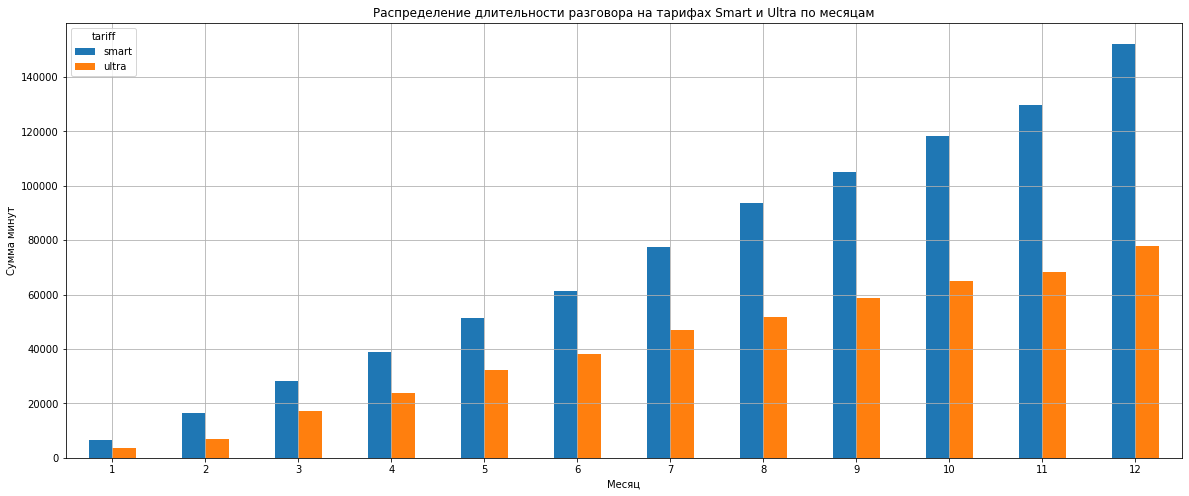

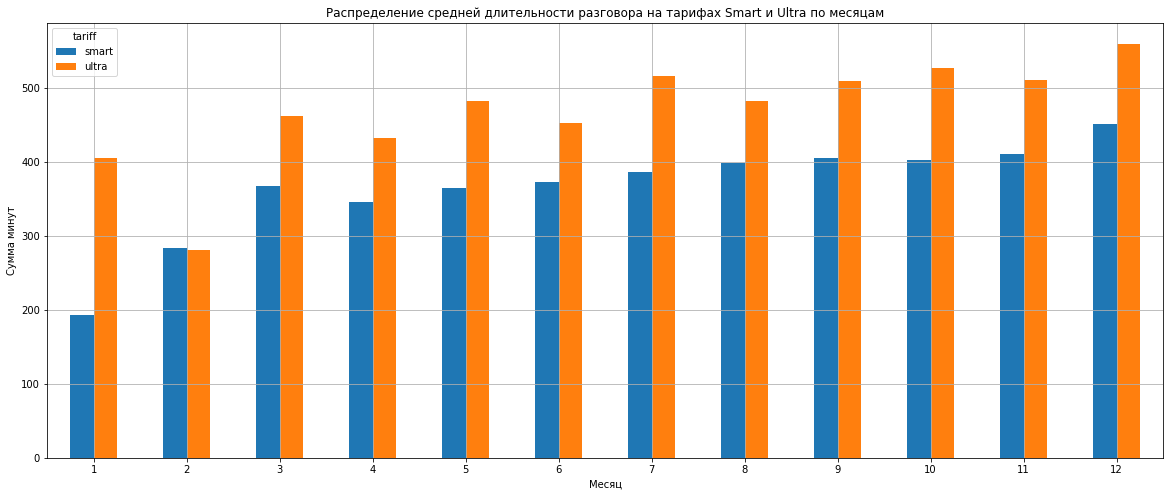

sum                  mean            
tariff      smart     ultra       smart       ultra
month                                              
1         6563.44   3643.00  193.042353  404.777778
2        16411.88   6733.70  282.963448  280.570833
3        28326.54  17107.31  367.877143  462.359730
4        38776.93  23753.99  346.222589  431.890727
5        51495.28  32275.49  365.214752  481.723731
6        61203.50  38046.21  373.192073  452.931071
7        77485.21  46888.02  385.498557  515.252967
8        93504.57  51567.06  397.891787  481.935140
9       105175.00  58548.16  404.519231  509.114435
10      118268.40  64799.98  402.273469  526.829106
11      129745.29  68460.94  410.586361  510.902537
12      152221.80  77788.34  451.696736  559.628345

In [13]:
(
report
      .pivot_table(index='month', columns='tariff', values='sum_min', aggfunc='sum')
      .plot(kind='bar', figsize=(20,8), rot=0, grid=True)
)
plt.title('Распределение длительности разговора на тарифах Smart и Ultra по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма минут')
plt.show()

(
report
      .pivot_table(index='month', columns='tariff', values='sum_min', aggfunc='mean')
      .plot(kind='bar', figsize=(20,8), rot=0, grid=True)
)
plt.title('Распределение средней длительности разговора на тарифах Smart и Ultra по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма минут')
plt.show()


t1 = report.pivot_table(index='month', columns='tariff', values='sum_min', aggfunc=['sum', 'mean'])
t1 # табличное представление

In [14]:
display(report.agg({'sum_min': ['mean', 'var', 'std']})) # Среднее, дисперсия и СКО для все выборки
display(report.groupby('tariff').agg({'sum_min': ['mean', 'var', 'std']})) # Среднее, дисперсия и СКО по тарифам

,sum_min
mean,425.883647
var,52243.132206
std,228.567566


sum_min                          
              mean           var         std
tariff                                      
smart   394.427026  32386.395979  179.962207
ultra   497.068223  89942.500370  299.904152

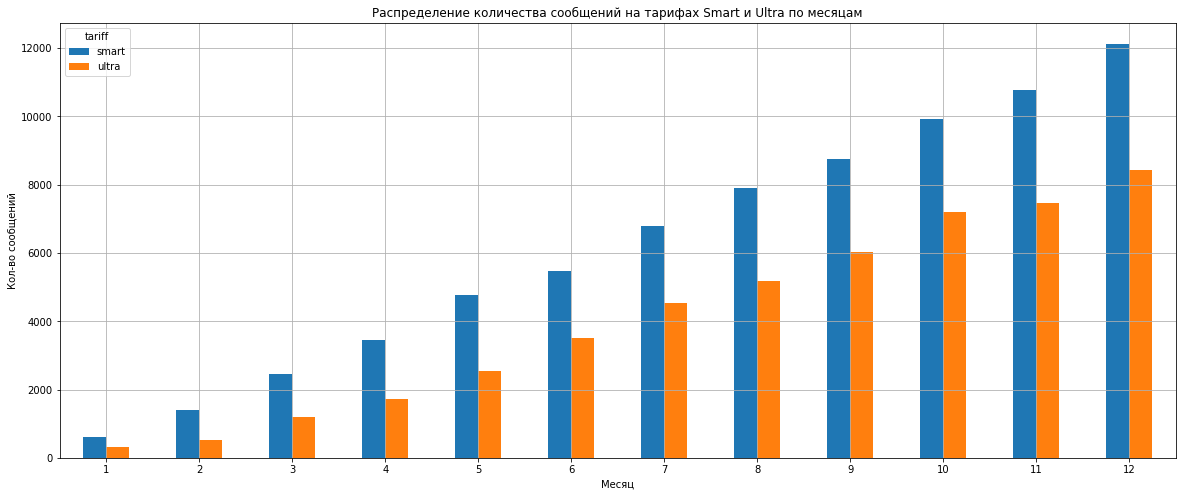

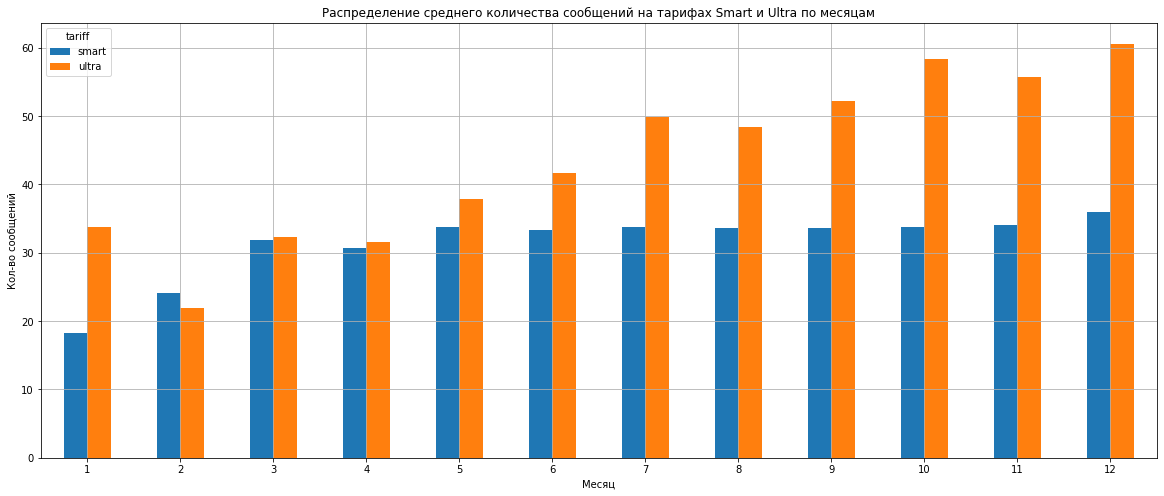

sum               mean           
tariff    smart   ultra      smart      ultra
month                                        
1         620.0   304.0  18.235294  33.777778
2        1397.0   527.0  24.086207  21.958333
3        2453.0  1195.0  31.857143  32.297297
4        3443.0  1736.0  30.741071  31.563636
5        4762.0  2536.0  33.773050  37.850746
6        5478.0  3505.0  33.402439  41.726190
7        6784.0  4536.0  33.751244  49.846154
8        7905.0  5183.0  33.638298  48.439252
9        8746.0  6013.0  33.638462  52.286957
10       9927.0  7187.0  33.765306  58.430894
11      10768.0  7476.0  34.075949  55.791045
12      12130.0  8425.0  35.994065  60.611511

In [15]:
(
report
      .pivot_table(index='month', columns='tariff', values='messages', aggfunc='sum')
      .plot(kind='bar', figsize=(20,8), rot=0, grid=True)
)
plt.title('Распределение количества сообщений на тарифах Smart и Ultra по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Кол-во сообщений')
plt.show()

(
report
      .pivot_table(index='month', columns='tariff', values='messages', aggfunc='mean')
      .plot(kind='bar', figsize=(20,8), rot=0, grid=True)
)
plt.title('Распределение среднего количества сообщений на тарифах Smart и Ultra по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Кол-во сообщений')
plt.show()

t2 = report.pivot_table(index='month', columns='tariff', values='messages', aggfunc=['sum', 'mean'])
t2 # табличное представление

In [16]:
display(report.agg({'messages': ['mean', 'var', 'std']})) # Среднее, дисперсия и СКО для всей выборки
display(report.groupby('tariff').agg({'messages': ['mean', 'var', 'std']})) # Среднее, дисперсия и СКО по тарифам

,messages
mean,38.281269
var,1306.701442
std,36.148326


messages                        
             mean          var        std
tariff                                   
smart   33.384029   796.812958  28.227876
ultra   49.363452  2285.266143  47.804457

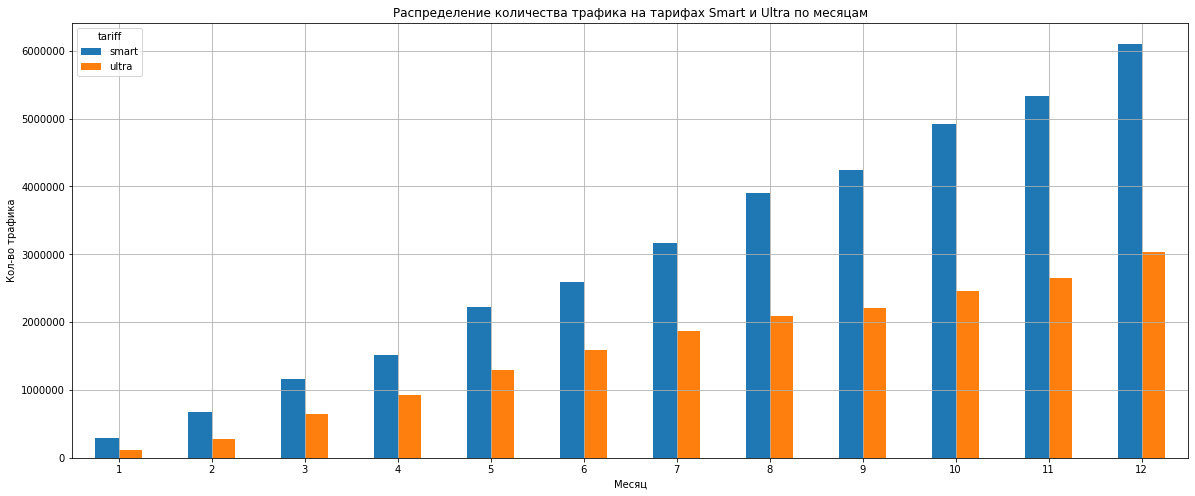

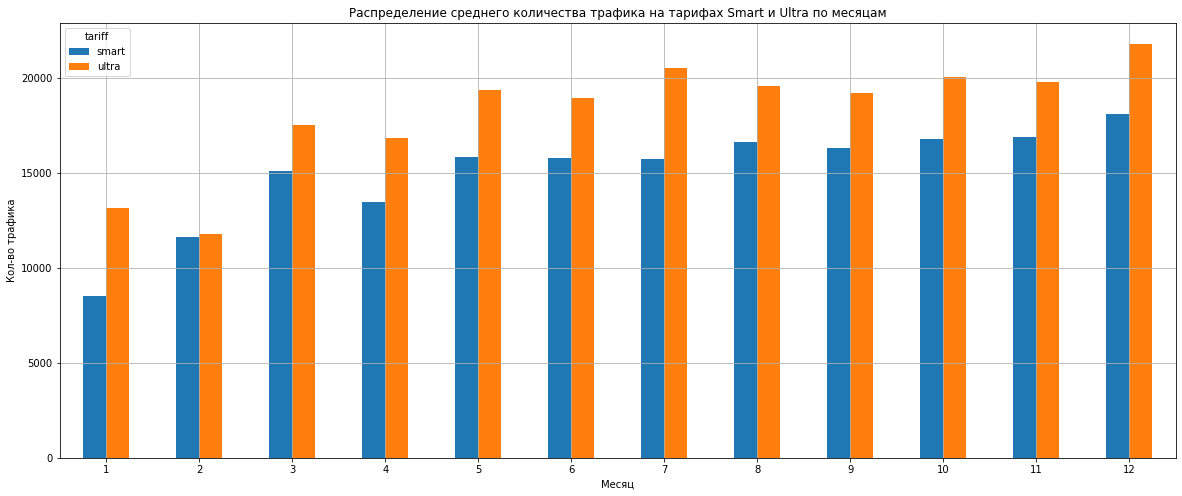

sum                      mean              
tariff       smart       ultra         smart         ultra
month                                                     
1        289466.40   118266.13   8513.717647  13140.681111
2        672629.15   282622.50  11597.054310  11775.937500
3       1163020.25   648815.36  15104.159091  17535.550270
4       1507764.23   925547.39  13462.180625  16828.134364
5       2228530.99  1297331.25  15805.184326  19363.152985
6       2590322.27  1589694.90  15794.647988  18924.939286
7       3164373.22  1865105.53  15743.150348  20495.665165
8       3903519.22  2094637.85  16610.720085  19576.054673
9       4238930.49  2208491.87  16303.578808  19204.277130
10      4926594.13  2465576.49  16757.122891  20045.337317
11      5339040.14  2651432.87  16895.696646  19786.812463
12      6104304.11  3029250.99  18113.662047  21793.172590

In [17]:
(
report
      .pivot_table(index='month', columns='tariff', values='mb_used', aggfunc='sum')
      .plot(kind='bar', figsize=(20,8), rot=0, grid=True)
)
plt.title('Распределение количества трафика на тарифах Smart и Ultra по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Кол-во трафика')
plt.show()

(
report
      .pivot_table(index='month', columns='tariff', values='mb_used', aggfunc='mean')
      .plot(kind='bar', figsize=(20,8), rot=0, grid=True)
)
plt.title('Распределение среднего количества трафика на тарифах Smart и Ultra по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Кол-во трафика')
plt.show()

t3 = report.pivot_table(index='month', columns='tariff', values='mb_used', aggfunc=['sum', 'mean'])
t3 # табличное представление 

In [18]:
display(report.agg({'mb_used': ['mean', 'var', 'std']})) # Среднее, дисперсия и СКО для всей выборки
display(report.groupby('tariff').agg({'mb_used': ['mean', 'var', 'std']})) # Среднее, дисперсия и СКО по тарифам

,mb_used
mean,1.720761e+04
var,5.731942e+07
std,7.570959e+03


mb_used                            
                mean           var           std
tariff                                          
smart   16208.386990  3.446250e+07   5870.476681
ultra   19468.805208  1.017510e+08  10087.170752

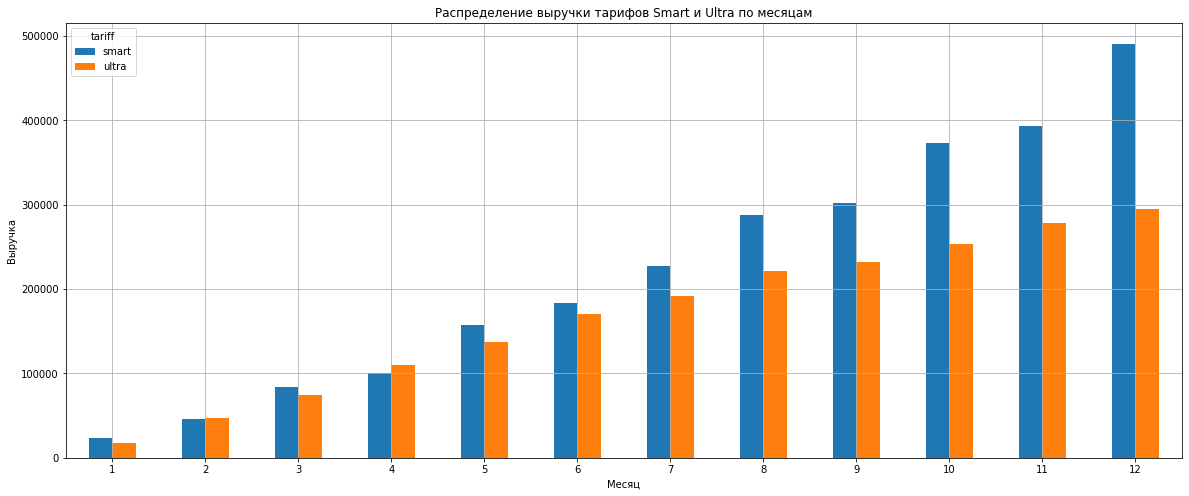

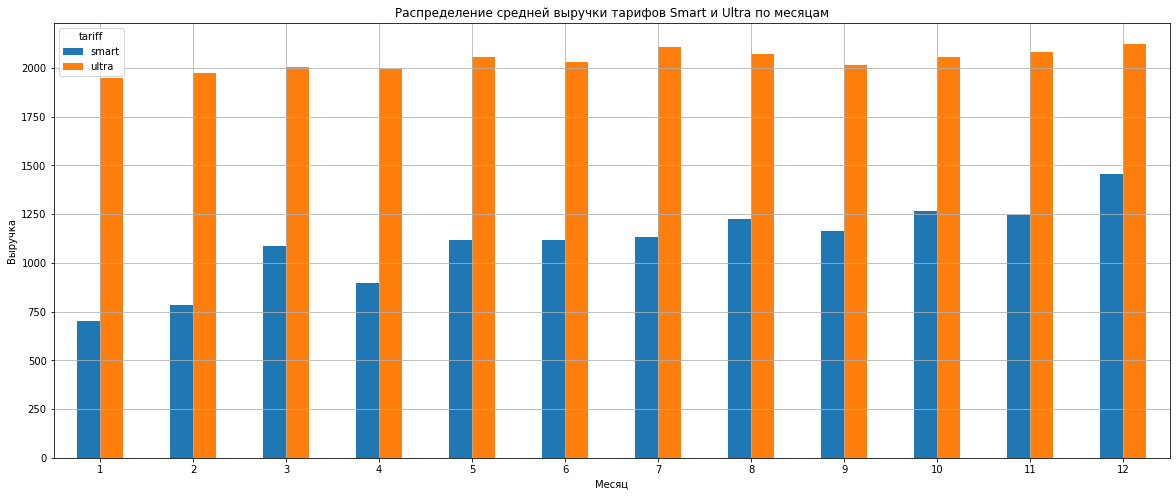

In [19]:
# Распределение выручки
(
report
      .pivot_table(index='month', columns='tariff', values='revenue', aggfunc='sum')
      .plot(kind='bar', figsize=(20,8), rot=0, grid=True)
)
plt.title('Распределение выручки тарифов Smart и Ultra по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show()

(
report
      .pivot_table(index='month', columns='tariff', values='revenue', aggfunc='mean')
      .plot(kind='bar', figsize=(20,8), rot=0, grid=True)
)
plt.title('Распределение средней выручки тарифов Smart и Ultra по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show()

## Шаг 3. Вывод:
Показали сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитали среднее количество, дисперсию и стандартное отклонение по наблюдаемым параметрам (всей выборки и по тарифам). Построили гистограммы распределения интересующих параметров по месяцам и вывели табличные представления.

Дополним. Исходя из наших распределений мы видим, что тариф Смарт пользуется большей популярностью. Среднее, интересующих нас параметров, показывает, что владельцы тарифа Ультра больше разговаривают, пишут и пользуются интернетом, собственно и выручка с этого тарифа, в некоторые месяцы в два раза выше, по сравнению с тарифом Смарт.

Дисперсия и квадратный корень из дисперсии, стандартное отклонение, описывают среднее отклонение от среднего значения выборки. Стандартное отклонение можно представить как среднее расстояние, на котором находятся элементы от среднего элемента выборки, более простыми словами стандартное отклонение показывает, насколько хорошо среднее значение описывает всю выборку. Мы представили статические параметры в таблицы "среднее-дисперсия-станд. отклонение", чтобы удобней было оценить как разбросаны данные в нашей выборке. Малое значение дисперсии или стандартного отклонения говорит о том, что все данные сосредоточены вокруг среднего арифметического, а большое значение этих величин – о том, что данные разбросаны в широком диапазоне значений.

## Шаг 4. Проверяем гипотезы
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов; \
Пороговое значение alpha зададим самостоятельно. \
Поясним:
как мы формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.

Исходя из задания "сделать предварительный анализ тарифов на небольшой выборке клиентов", мы знаем, что наши данные это небольшая выборка большого объема данных (генеральной совокупности). \
Алгоритм проверки стат. гипотез всегда начинаем с формулирования гипотез. Сначала формулируем нулевую гипотезу Н(o) - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается (равенство средних). Исходя из нее формулируем альтернативную гипотезу Н(1) - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается (не равенство средних). Решение о принятии или отвержении нулевой гипотезы примем по значению p-value (это вероятность получить наблюдаемый результат при условии что нулевая гипотеза верна). Общепринятые пороговые значения 5% и 1%. \
Проверим гипотезу о равенстве средних с помощью метода scipy.stats.ttest_ind(), ведь без проведения корректного теста нельзя считать отличия случайными или разницу достаточной, чтобы полагать суммы выручки разными.

In [20]:
print('Средняя выручка пользователей тарифа Ultra:', report.query('tariff == "ultra"')['revenue'].mean())
print('Средняя выручка пользователей тарифа Smart:', report.query('tariff == "smart"')['revenue'].mean())

Средняя выручка пользователей тарифа Ultra: 2059.8
Средняя выручка пользователей тарифа Smart: 1197.292059219381


Значима ли разница между этими числами? Зависит от дисперсии выборок, по которым рассчитаны значения. Вместо расчёта и сравнения самих средних, используем эти датасеты для проведения стат. теста.

In [21]:
alpha = .05 # установим пороговое значение
results = st.ttest_ind(report.query('tariff == "smart"')['revenue'], report.query('tariff == "ultra"')['revenue'], equal_var = True)
print(results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.3629049353797918e-213
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что такие средние значения выручки по двум тарифам, с вероятностью в почти 0% можно получить случайно. Делаем вывод о значимом различии между средними выручками Smart и Ультра. \
Проведем аналогичное исследование, только между средней выручкой по городу Москва и остальными.

In [22]:
print('Средняя выручка пользователей Москвы:', report.query('city == "Москва"')['revenue'].mean())
print('Средняя выручка пользователей прочих городов:', report.query('city != "Москва"')['revenue'].mean())

Средняя выручка пользователей Москвы: 1484.8821603927986
Средняя выручка пользователей прочих городов: 1456.1674990395697


In [23]:
alpha = .05 # установим пороговое значение
results2 = st.ttest_ind(report.query('city == "Москва"')['revenue'], report.query('city != "Москва"')['revenue'], equal_var = True)
print(results2.pvalue)
if (results2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.4116619137352753
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хоть средняя выручка из Москвы и остальных городов неодинакова, с вероятностью в почти 40% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними.

In [24]:
# Эксперимент. Изменится ли что-нибудь если уравнять выборки (тариф Smart в два раза популярнее)
print(report['tariff'].value_counts())
smrt_set = report.query('tariff == "smart"').sample(985) # выборка в 985 случайных значений

smart    2229
ultra     985
Name: tariff, dtype: int64


In [25]:
alpha = .05
results = st.ttest_ind(smrt_set['revenue'], report.query('tariff == "ultra"')['revenue'], equal_var = True)
print(results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") # никаких особых изменений

8.316046857091255e-152
Отвергаем нулевую гипотезу


## Шаг 4. Вывод:
Сформулировали нулевые и альтернативные гипотезы, выбрали пороговое значение в 5% и с помощью метода scipy.stats.ttest_ind() проверили выдвинутые гипотезы.
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается - Не получилось отвергнуть нулевую гипотезу
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - Отвергли нулевую гипотезу
 
Стоит обратить внимание на формулировку результатов. Отметим, что данные никогда не смогут доказать или подтвердить гипотезу. Это принципиально важно: обладая лишь выборкой, мы никогда не знаем ничего о генеральной совокупности достоверно. А если бы и знали, статистический тест был бы уже не нужен. Мы можем лишь сделать предположение о генеральной совокупности, и при условии того, что оно верно, посчитать, насколько вероятно увидеть в выборке то, что мы в ней видим. Если эта вероятность относительно высока — данные не дают основания отвергнуть это предположение. Если эта вероятность низка — по наблюдаемым данным можно сделать вывод, что, скорее всего, наше предположение всё-таки неверно (но не опровергнуть его и не доказать обратное).

# Общий вывод:
Подготовили предоставленные данные и сделали предварительный анализ тарифов на небольшой выборке клиентов. Изучили поведение клиентов, объем их потребностей в сервисах Мегалайн. Согласно нашим распределениям средняя выручка от пользователей тарифа Ultra выше, эта информация поможет коммерческому департаменту скорректировать рекламный бюджет.  Однако нельзя не отметить высокую популярность тарифа Smart (почти в два раза больше пользователей конкретно на этой выборке). Основной задачей анализа было выявить наиболее выгодный тариф, т.е. прибыльный, таковым является тариф Smart с его суммарной выручкой в 2668764, против 2028903 тарифа Ультра.